In [1]:
f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

SyntaxError: cannot assign to function call (270930564.py, line 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
limit = 100
step = 0.01
increase_high = True  #функция возрастает - истина
color = 'r'
line_style = '-.'

In [4]:
x_change = {-limit:'inc'} # словарь содержит все точки перелома функции, ключ координаты на оси Х

In [5]:
x = np.arange(-limit, limit, step) # здесь создается список значений Х для функции

In [6]:
a, b, c, d, e = -12, -18, 5, 10, -30

In [7]:
#указаывем(называем) саму функцию
def f(x):
    func = a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x + e
    return func

In [8]:
#универсальный "перекрашиватель" графика при смене значения функции
def switch_color(): 
    global color
    if color == 'r':
        color = 'b'
    else:
        color = 'r'
    return color

In [9]:
#универсальный блок для изменения стиля линии
def switch_line():
    global line_style
    if line_style == '-':
        line_style = '-.'
    else:
        line_style = '-'
    return line_style

In [10]:
x_min = -limit
f_min = f(-limit)

In [11]:
# определяются мин значения на всем промежутке
for x_cur in x:
    if f(x_cur) < f_min:
        f_min = np.round(f(x_cur), 2)
        x_min = np.round(x_cur, 2)

In [12]:
print(x_min, f_min) #координаты вершины

99.99 -924805699.33


In [13]:
for i in range(len(x)-1):
    if (f(x[i]) > 0 and f(x[i+1]) < 0) or (f(x[i]) < 0 and f(x[i+1]) > 0):
        x_change[x[i]] = 'zero'  # в словарь добавляеется значение Х, где Y меняет знак
    if increase_high:
        if f(x[i]) > f(x[i+1]): # определяются точки перегиба графика
            increase_high = False
            x_change[x[i]] = 'inc'
    else:
        if f(x[i]) < f(x[i+1]):
            increase_high = True
            x_change[x[i]] = 'inc' 

In [14]:
x_change[limit] = 'inc'
print(x_change)

{-100: 'inc', -98.97999999999948: 'zero', -97.4499999999987: 'inc', -95.80999999999786: 'zero', -94.30999999999709: 'inc', -92.69999999999627: 'zero', -91.17999999999549: 'inc', -89.51999999999464: 'zero', -88.02999999999388: 'inc', -86.41999999999305: 'zero', -84.89999999999227: 'inc', -83.23999999999143: 'zero', -81.75999999999067: 'inc', -80.12999999998983: 'zero', -78.61999999998906: 'inc', -76.94999999998821: 'zero', -75.47999999998746: 'inc', -73.84999999998662: 'zero', -72.33999999998585: 'inc', -70.669999999985: 'zero', -69.19999999998424: 'inc', -67.56999999998341: 'zero', -66.06999999998264: 'inc', -64.37999999998178: 'zero', -62.929999999981035: 'inc', -61.289999999980196: 'zero', -59.799999999979434: 'inc', -58.099999999978564: 'zero', -56.64999999997782: 'inc', -55.00999999997698: 'zero', -53.51999999997622: 'inc', -51.809999999975346: 'zero', -50.379999999974615: 'inc', -48.72999999997377: 'zero', -47.25999999997302: 'inc', -45.51999999997213: 'zero', -44.11999999997141: 

In [16]:
x_keys = [x for x in x_change]
x_keys.sort()  # сортировка значений в словаре с ключами
print(x_keys)


[-100, -98.97999999999948, -97.4499999999987, -95.80999999999786, -94.30999999999709, -92.69999999999627, -91.17999999999549, -89.51999999999464, -88.02999999999388, -86.41999999999305, -84.89999999999227, -83.23999999999143, -81.75999999999067, -80.12999999998983, -78.61999999998906, -76.94999999998821, -75.47999999998746, -73.84999999998662, -72.33999999998585, -70.669999999985, -69.19999999998424, -67.56999999998341, -66.06999999998264, -64.37999999998178, -62.929999999981035, -61.289999999980196, -59.799999999979434, -58.099999999978564, -56.64999999997782, -55.00999999997698, -53.51999999997622, -51.809999999975346, -50.379999999974615, -48.72999999997377, -47.25999999997302, -45.51999999997213, -44.11999999997141, -42.44999999997056, -40.98999999996981, -39.239999999968916, -37.849999999968205, -36.17999999996735, -34.739999999966614, -32.9499999999657, -31.599999999965007, -29.899999999964137, -28.489999999963416, -26.649999999962475, -25.34999999996181, -23.62999999996093, -22.

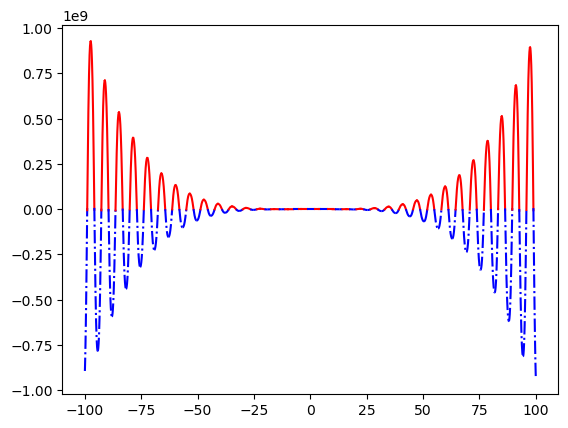

In [18]:
for i in range(len(x_keys) - 1):
    x_cur = np.arange(x_keys[i], x_keys[i+1] + step, step) 
    if x_change.get(x_keys[i]) == 'zero': # если значению ключа соответствует zero - меняем линию
        switch_line()
    else: # x_change.get(x_keys[i]) == 'inc': если значению ключа соответствует перегиб - меняем цвет
        switch_color()
    plt.rcParams['lines.linestyle'] = line_style #рисуем нужной линией
    plt.plot(x_cur, f(x_cur), switch_color())  #рисуем нужным цветом
plt.show()